# **Insurance Claim Prediction Project**

## **Business Question**
**"How can an insurance company predict the claim amount for individuals based on demographic and health factors to better assess risks and optimize pricing strategies?"**

---

## **Project Objective**
The objective of this project is to develop a predictive model that accurately estimates insurance claim amounts using demographic and health-related data. By understanding the key factors driving claims, insurance companies can:
- **Optimize Pricing**: Design fair and competitive premiums.
- **Assess Risk**: Identify high-risk customers effectively.
- **Enhance Profitability**: Reduce over- and underestimations of claims, ensuring operational efficiency.

---

## **Why This Matters**
1. **Relevance**: Accurate claim predictions help insurers maintain profitability while offering competitive and fair pricing.
2. **Impact**: Improved risk assessment ensures customer satisfaction by aligning premiums with individual risk profiles.
3. **Actionable Insights**: Understanding the drivers behind high claim amounts enables insurers to design tailored policies and health-focused incentives.

---

## **Methodology**
This project follows a structured approach, focusing on end-to-end machine learning model development. The key steps include:

1. **Data Preprocessing**:
   - Handling missing values with imputation and indicators.
   - Encoding categorical variables and normalizing numerical features.

2. **Exploratory Data Analysis (EDA)**:
   - Analyzing feature distributions and correlations.
   - Identifying key trends and outliers.

3. **Model Development**:
   - Training regression models, including **Linear Regression**, **Random Forest**, and **Gradient Boosting**.
   - Fine-tuning hyperparameters to improve model performance.

4. **Model Evaluation**:
   - Evaluating models using metrics like **RMSLE**, **R²**, and **MAE**.
   - Interpreting model outputs using **SHAP values** and feature importance analysis.

5. **Business Insights & Recommendations**:
   - Translating technical findings into actionable insights.
   - Offering recommendations for improving risk assessment and operational strategies.

---

## **Deliverables**
- A predictive model for insurance claims with clear performance metrics.
- Insights into the key factors influencing claim amounts.
- Actionable recommendations for optimizing pricing and assessing risks.

---

## **Outcome**
This project aims to provide a robust, interpretable solution for predicting insurance claim amounts, enabling insurers to improve risk assessment, profitability, and customer satisfaction.


## 📂 Data Loading and Initial Exploration

In this section, we load the insurance dataset and perform an initial exploration to understand its structure and contents.

### 🔹 Step 1: Load the Dataset
We use the `pandas` library to read the dataset from a CSV file. The dataset includes demographic and health-related attributes, which will be analyzed to predict insurance claim amounts.

### 🔹 Dataset Overview
- The dataset contains **11 columns** and **1340 rows**.
- Key attributes include:
  - `PatientID`: Unique identifier for patients.
  - `age`: Patient's age.
  - `gender`: Patient's gender.
  - `bmi`: Body Mass Index (BMI).
  - `bloodpressure`: Blood pressure levels.
  - `diabetic`: Indicates if the patient is diabetic.
  - `children`: Number of children covered under the insurance.
  - `smoker`: Indicates if the patient smokes.
  - `region`: Patient's residential region.
  - `claim`: Insurance claim amount.

### 🔹 Display of Initial Data
- Basic dataset information was retrieved using `df.info()`:
  - Data types include `int64`, `float64`, and `object`.
  - Some columns, like `age`, have missing values.
- The first few rows of the dataset were displayed using `df.head()`, providing a snapshot of the data.


In [21]:
import pandas as pd

# Load the dataset
file_path = "Insurance Claim Analysis Demographic and Health.csv"  # Update with the actual path
df = pd.read_csv(file_path)

# Display basic information and first few rows
print("Dataset Overview:")
print(df.info())
print("\nFirst Few Rows of the Dataset:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB
None

First Few Rows of the Dataset:
   index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
0      0          1  39.0   male  23.2             91      Yes         0   
1      1          2  24.0   male  30.1            

## 📊 Summary Statistics and Missing Values Analysis

### 🔹 Step 2: Summary Statistics
We use `df.describe()` to calculate summary statistics for the numerical columns in the dataset. These statistics include:
- **Count**: Number of non-null entries.
- **Mean**: Average value.
- **Standard Deviation (std)**: Measures variability in the data.
- **Min, 25%, 50% (Median), 75%, Max**: Percentile-based measures for data distribution.

Key Observations:
- The `age` column has a minimum value of 18 and a maximum value of 60.
- The `claim` amount ranges from **1121.87** to **63770.43**, with a mean of **13252.75**.
- BMI values vary between **16** and **53.1**, with a mean of **30.67**.

### 🔹 Step 3: Missing Values Analysis
To assess data completeness, we calculated the number and percentage of missing values for each column using `df.isnull().sum()` and percentage calculations.

#### Missing Values Summary:
- The `age` column has 5 missing values, accounting for **0.37%** of the dataset.
- No missing values were observed in other columns.

These insights will guide us in handling missing data and performing further preprocessing for model development.


In [23]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
missing_values_summary = df.isnull().sum()
missing_percentage = (missing_values_summary / len(df)) * 100
missing_df = pd.DataFrame({
    "Missing Values": missing_values_summary,
    "Percentage Missing (%)": missing_percentage
})

print("\nMissing Values Summary:")
print(missing_df)



Summary Statistics:
             index    PatientID          age          bmi  bloodpressure  \
count  1340.000000  1340.000000  1335.000000  1340.000000    1340.000000   
mean    669.500000   670.500000    38.078652    30.668955      94.157463   
std     386.968991   386.968991    11.102924     6.106735      11.434712   
min       0.000000     1.000000    18.000000    16.000000      80.000000   
25%     334.750000   335.750000    29.000000    26.275000      86.000000   
50%     669.500000   670.500000    38.000000    30.400000      92.000000   
75%    1004.250000  1005.250000    47.000000    34.700000      99.000000   
max    1339.000000  1340.000000    60.000000    53.100000     140.000000   

          children         claim  
count  1340.000000   1340.000000  
mean      1.093284  13252.745642  
std       1.205334  12109.609288  
min       0.000000   1121.870000  
25%       0.000000   4719.685000  
50%       1.000000   9369.615000  
75%       2.000000  16604.305000  
max       5.00

## 📊 Data Distribution Analysis

### 🔹 Step 4: Distribution of Numerical Variables
We visualized the distributions of key numerical variables in the dataset using histograms and kernel density estimation (KDE) plots to better understand their patterns and spread.

#### Variables Analyzed:
- **Age**: Appears to be uniformly distributed across the range of 18 to 60.
- **BMI**: Exhibits a slightly right-skewed distribution, with most values concentrated around 30.
- **Blood Pressure**: Shows a normal-like distribution centered around 92.
- **Children**: Displays a discrete distribution, with the majority of data points having 0 or 1 child.
- **Claim Amount**: Heavily right-skewed, indicating most claims are on the lower end, with a few high-value outliers.

### 🔹 Insights:
- The skewed distributions for **BMI** and **Claim Amount** may require transformation (e.g., log transformation) to normalize the data for predictive modeling.
- The discrete nature of the **Children** column indicates it could be treated as a categorical variable in some contexts.

The visualizations provide an overview of the variable distributions, guiding potential preprocessing steps for machine learning tasks.


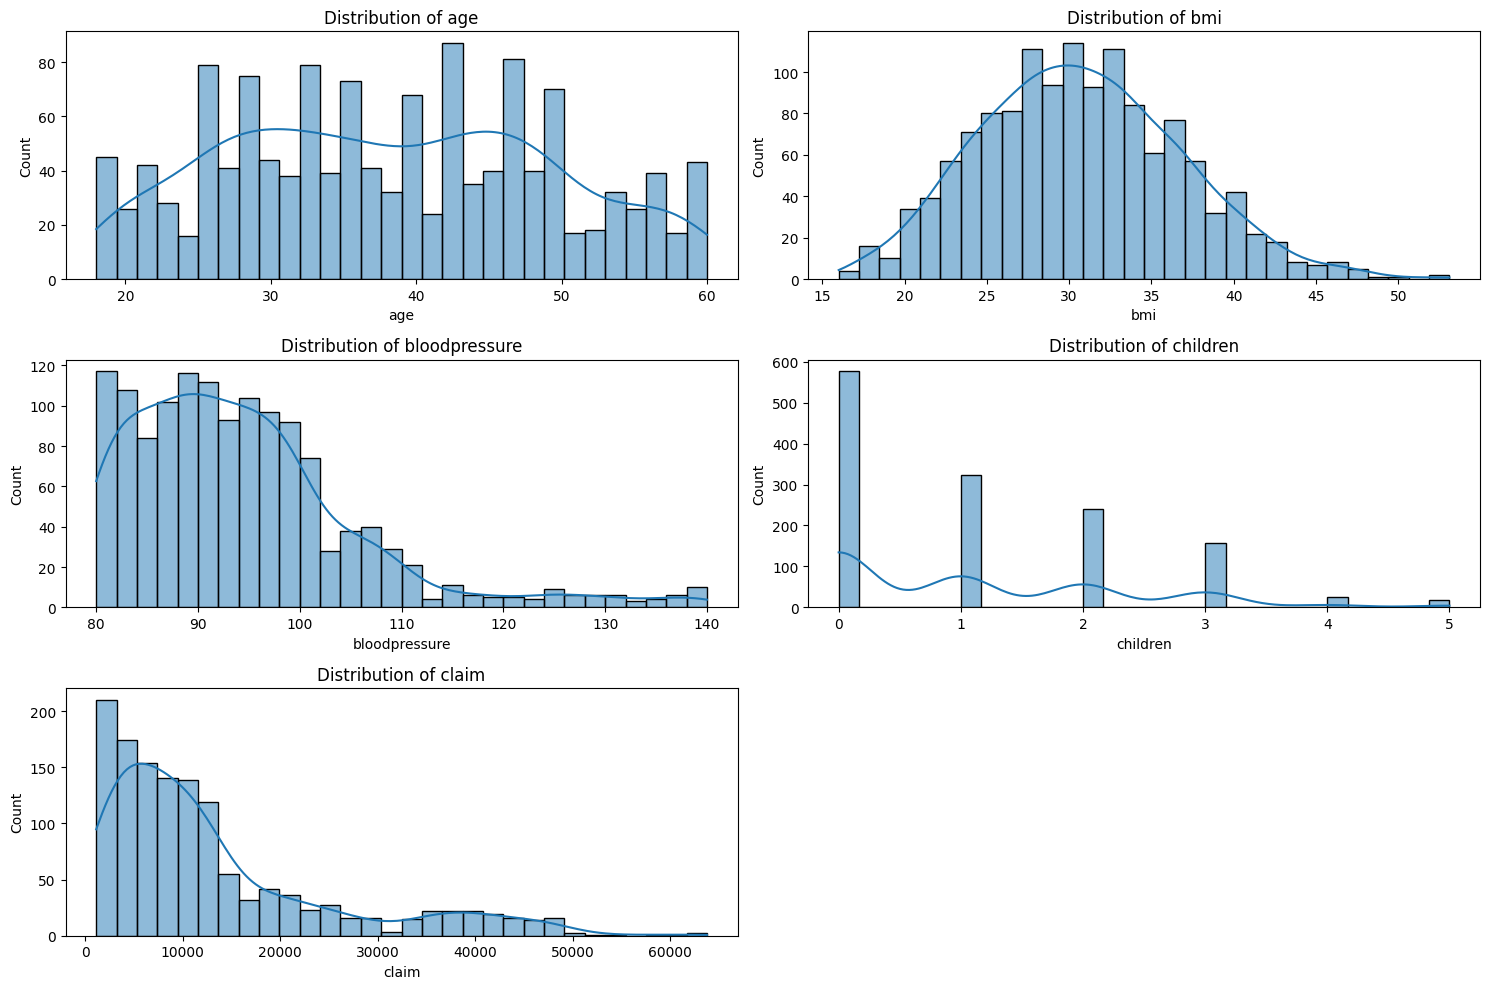

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical variables
numerical_cols = ['age', 'bmi', 'bloodpressure', 'children', 'claim']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


## 📈 Correlation Analysis

### 🔹 Step 5: Correlation Heatmap
We visualized the correlation between numerical variables in the dataset using a heatmap. This helps identify relationships between features that may influence the target variable (`claim`).

#### Key Observations:
- **Claim**:
  - Shows a moderate positive correlation with `bloodpressure` (**0.53**).
  - Exhibits a weak positive correlation with `bmi` (**0.20**) and `children` (**0.07**).
  - Correlation with `age` is negligible (**-0.03**).
- **Blood Pressure**:
  - Positively correlated with `bmi` (**0.14**).
  - Weak or no correlation with other variables.

The correlation heatmap provides insights into feature relationships, guiding feature selection and preprocessing for machine learning models.


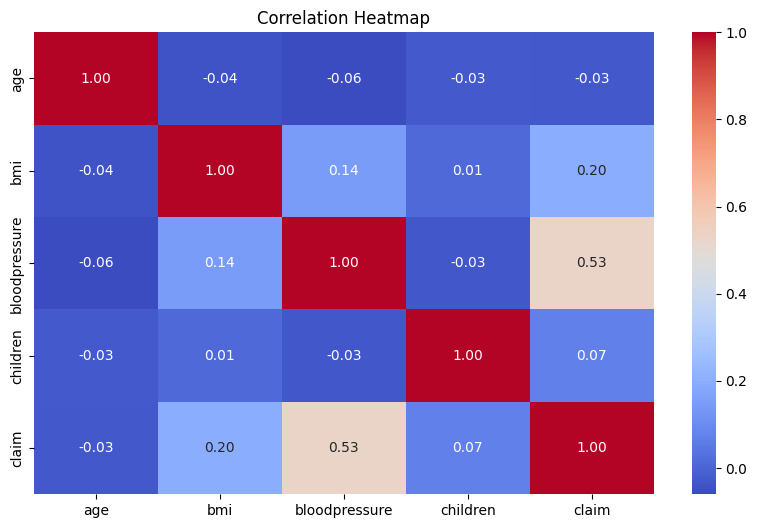

In [27]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 📂 Dataset Splitting

### 🔹 Step 6: Splitting Data into Training and Test Sets
To prepare the data for model development and evaluation, we split the dataset into training and test sets using an 80-20 split. This ensures that the model is trained on a large portion of the data while having a separate test set to evaluate its performance.

#### Key Details:
- **Features (X)**: All columns except `claim`.
- **Target (y)**: `claim` column.

#### Split Sizes:
- **Training Set**:
  - Features: 1072 samples, 10 columns.
  - Target: 1072 samples.
- **Test Set**:
  - Features: 268 samples, 10 columns.
  - Target: 268 samples.

The split was performed using `train_test_split` from `sklearn.model_selection` with a fixed random state (`random_state=42`) to ensure reproducibility.


In [29]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['claim'], axis=1)
y = df['claim']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display sizes of the splits
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")


Training Set: (1072, 10), (1072,)
Test Set: (268, 10), (268,)


## 🛠️ Handling Missing Values

### 🔹 Step 7: Imputation and Missingness Indicators
To address missing values in the dataset, we employed the following strategies:

#### Key Steps:
1. **Missingness Indicators**:
   - Created binary indicators to capture missingness for the `age` and `region` columns:
     - `age_missing`: Indicates if the `age` value is missing (1 for missing, 0 otherwise).
     - `region_missing`: Indicates if the `region` value is missing (1 for missing, 0 otherwise).

2. **Imputation**:
   - Imputed missing `age` values with **0**.
   - Imputed missing `region` values with the string **"Unknown"**.

3. **Verification**:
   - Ensured no missing values remain in the training and test datasets using `isnull().sum()`.

#### Results:
- Training and test datasets are now free of missing values.
- Additional columns (`age_missing` and `region_missing`) provide information on imputed data.

These preprocessing steps ensure that the dataset is ready for further modeling without losing information about missing data patterns.


In [31]:
# Step 1: Handling Missing Values with Indicators

# Add missingness indicator for 'age'
X_train['age_missing'] = X_train['age'].isnull().astype(int)
X_test['age_missing'] = X_test['age'].isnull().astype(int)

# Impute missing values in 'age' with 0
X_train['age'].fillna(0, inplace=True)
X_test['age'].fillna(0, inplace=True)

# Add missingness indicator for 'region'
X_train['region_missing'] = X_train['region'].isnull().astype(int)
X_test['region_missing'] = X_test['region'].isnull().astype(int)

# Impute missing values in 'region' with 'Unknown'
X_train['region'].fillna('Unknown', inplace=True)
X_test['region'].fillna('Unknown', inplace=True)

# Verify no missing values remain
print("\nMissing Values After Imputation (Training Data):")
print(X_train.isnull().sum())

print("\nMissing Values After Imputation (Test Data):")
print(X_test.isnull().sum())



Missing Values After Imputation (Training Data):
index             0
PatientID         0
age               0
gender            0
bmi               0
bloodpressure     0
diabetic          0
children          0
smoker            0
region            0
age_missing       0
region_missing    0
dtype: int64

Missing Values After Imputation (Test Data):
index             0
PatientID         0
age               0
gender            0
bmi               0
bloodpressure     0
diabetic          0
children          0
smoker            0
region            0
age_missing       0
region_missing    0
dtype: int64


C:\Users\prana\AppData\Local\Temp\ipykernel_5224\754357219.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['age'].fillna(0, inplace=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_5224\754357219.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

## 🔄 Encoding Categorical Variables

### 🔹 Step 8: One-Hot Encoding
To prepare categorical variables for use in machine learning models, we applied one-hot encoding to convert them into numerical representations.

#### Key Steps:
1. **Selected Categorical Columns**:
   - `gender`
   - `smoker`
   - `diabetic`
   - `region`

2. **One-Hot Encoding**:
   - Used `pd.get_dummies` to create binary columns for each category, dropping the first category to avoid multicollinearity.
   - Applied encoding separately to the training (`X_train`) and test (`X_test`) datasets.

3. **Column Alignment**:
   - Ensured the encoded test dataset (`X_test_encoded`) has the same columns as the training dataset (`X_train_encoded`) by reindexing with `fill_value=0` for missing columns.

#### Results:
- **Encoded Training Data**: Includes new binary columns for encoded categorical variables.
- **Encoded Test Data**: Aligned with the training data to maintain consistency.

This encoding step ensures categorical data is in a format suitable for machine learning algorithms.


In [35]:
# Step 2: Encoding Categorical Variables

# List of categorical columns to encode
categorical_cols = ['gender', 'smoker', 'diabetic', 'region']

# Apply one-hot encoding to both training and test datasets
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure both datasets have the same columns after encoding
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Display encoded datasets
print("\nEncoded Training Data:")
print(X_train_encoded.head())

print("\nEncoded Test Data:")
print(X_test_encoded.head())



Encoded Training Data:
      index  PatientID   age   bmi  bloodpressure  children  age_missing  \
1148   1148       1149  32.0  26.7            115         1            0   
807     807        808  51.0  25.7             83         0            0   
1287   1287       1288  32.0  39.0             96         0            0   
590     590        591  38.0  23.4             96         3            0   
1188   1188       1189  37.0  28.3             88         3            0   

      region_missing  gender_male  smoker_Yes  diabetic_Yes  region_northeast  \
1148               0         True        True          True             False   
807                0        False       False          True             False   
1287               0        False        True          True             False   
590                0        False       False          True              True   
1188               0         True        True         False             False   

      region_northwest  region_s

## 🛠️ Feature Engineering

### 🔹 Step 9: Adding New Features
To enhance the dataset and potentially improve the model's predictive power, we engineered new features based on domain knowledge.

#### Key Steps:
1. **Risk Score**:
   - Created a composite health risk score by summing points for key risk factors:
     - Smoking (`+3` points for `smoker_Yes`).
     - Diabetes (`+2` points for `diabetic_Yes`).
     - Obesity (`+2` points for `bmi > 30`).
     - High blood pressure (`+2` points for `bloodpressure > 120`).
   - The `risk_score` column quantifies overall health risk for each individual.

2. **BMI Categories**:
   - Grouped BMI values into clinical categories:
     - `Underweight`: `bmi < 18.5`
     - `Normal`: `18.5 ≤ bmi < 25`
     - `Overweight`: `25 ≤ bmi < 30`
     - `Obese`: `bmi ≥ 30`
   - One-hot encoded the BMI categories (`bmi_cat_Overweight` and `bmi_cat_Obese`).

#### Results:
- **New Features**:
  - `risk_score`: Composite score indicating health risks.
  - Encoded BMI categories: `bmi_cat_Overweight` and `bmi_cat_Obese`.

- **Dataset Update**:
  - Training data shape: `(1072, 19)` (includes new features).
  - Preview of new features:
    - `risk_score`: Composite health risk indicator.
    - `bmi_cat_Overweight` and `bmi_cat_Obese`: Encoded BMI categories.

These new features provide additional insights and are expected to enhance the model's predictive capabilities.


In [37]:
# Step 3: Feature Engineering

# 1. Risk Score - Composite health risk indicator
def calculate_risk_score(row):
    score = 0
    # Add points for key risk factors
    if row['smoker_Yes']:
        score += 3  # Smoking is a major risk factor
    if row['diabetic_Yes']:
        score += 2  # Diabetes is significant
    if row['bmi'] > 30:
        score += 2  # Obesity impact
    if row['bloodpressure'] > 120:
        score += 2  # High blood pressure
    return score

# Add risk score to both datasets
X_train_encoded['risk_score'] = X_train_encoded.apply(calculate_risk_score, axis=1)
X_test_encoded['risk_score'] = X_test_encoded.apply(calculate_risk_score, axis=1)

# 2. BMI Categories - Clinical groupings
def create_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Add BMI categories and encode
X_train_encoded['bmi_category'] = X_train_encoded['bmi'].apply(create_bmi_category)
X_test_encoded['bmi_category'] = X_test_encoded['bmi'].apply(create_bmi_category)

# One-hot encode BMI categories
bmi_dummies_train = pd.get_dummies(X_train_encoded['bmi_category'], prefix='bmi_cat', drop_first=True)
bmi_dummies_test = pd.get_dummies(X_test_encoded['bmi_category'], prefix='bmi_cat', drop_first=True)

# Add encoded BMI categories to datasets
X_train_encoded = pd.concat([X_train_encoded.drop('bmi_category', axis=1), bmi_dummies_train], axis=1)
X_test_encoded = pd.concat([X_test_encoded.drop('bmi_category', axis=1), bmi_dummies_test], axis=1)

# Verify new features
print("\nNew features added. Updated shape:", X_train_encoded.shape)
print("\nNew features preview:")
print(X_train_encoded[['risk_score', 'bmi_cat_Overweight', 'bmi_cat_Obese']].head())


New features added. Updated shape: (1072, 19)

New features preview:
      risk_score  bmi_cat_Overweight  bmi_cat_Obese
1148           5                True          False
807            2                True          False
1287           7               False           True
590            2               False          False
1188           3                True          False


## 🗑️ Dropping Unnecessary Columns and Transforming Boolean Features

### 🔹 Step 10: Data Cleanup
To finalize the dataset for machine learning models, we performed the following cleanup steps:

#### Key Steps:
1. **Dropped Unnecessary Columns**:
   - Removed `index` and `PatientID` columns from both the training and test datasets as they do not contribute to the predictive task.

2. **Transformed Boolean Columns**:
   - Converted all boolean columns (`True/False`) into binary values (`1/0`) for compatibility with machine learning algorithms.

#### Results:
- The datasets are now clean and contain only relevant numerical and binary features, ready for model training and evaluation.


In [39]:
# Drop unnecessary columns and transfor boolean columns to binary
X_train_encoded = X_train_encoded.drop(["index","PatientID"],axis=1).replace({True: 1, False: 0})
X_test_encoded = X_test_encoded.drop(["index","PatientID"],axis=1).replace({True: 1, False: 0})

C:\Users\prana\AppData\Local\Temp\ipykernel_5224\944866203.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_encoded = X_train_encoded.drop(["index","PatientID"],axis=1).replace({True: 1, False: 0})
C:\Users\prana\AppData\Local\Temp\ipykernel_5224\944866203.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_encoded = X_test_encoded.drop(["index","PatientID"],axis=1).replace({True: 1, False: 0})


## 📊 Model Evaluation

### 🔹 Step 11: Training and Evaluating Models
We trained and evaluated multiple regression models using the Root Mean Squared Logarithmic Error (RMSLE) metric. RMSLE is less sensitive to outliers and emphasizes relative errors, making it suitable for datasets with a wide range of target values.

#### Models Evaluated:
1. **Random Forest Regressor**
2. **Gradient Boosting Regressor**
3. **Ridge Regression**
4. **Support Vector Regressor (SVR)**
5. **K-Nearest Neighbors Regressor (KNN)**

#### Results:
- **Random Forest RMSLE**: 0.6186
- **Gradient Boosting RMSLE**: 0.5952 (Best performance)
- **Ridge Regression RMSLE**: 0.7665
- **SVR RMSLE**: 0.9229
- **KNN RMSLE**: 0.8207

#### Key Observations:
- Gradient Boosting achieved the lowest RMSLE, indicating the best predictive performance among the evaluated models.
- Support Vector Regressor (SVR) and K-Nearest Neighbors (KNN) had the highest RMSLE, suggesting they might require further tuning or may not be well-suited for this dataset.

These results provide a solid baseline for further optimization and hyperparameter tuning of the models.


In [41]:
from sklearn.ensemble import  GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Define Models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
ridge_model = Ridge(random_state=42)
svr_model = SVR()
knn_model = KNeighborsRegressor()

# Train Models
rf_model.fit(X_train_encoded, y_train)
gb_model.fit(X_train_encoded, y_train)
ridge_model.fit(X_train_encoded, y_train)
svr_model.fit(X_train_encoded, y_train)
knn_model.fit(X_train_encoded, y_train)

# Evaluate Models
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))


# Root Mean Squared Logarithmic Error (RMSLE) is a good initial choice. It's less sensitive to outliers and focuses on relative errors, which are often more meaningful when dealing with a wide range of values.
print("Default Model Performance:")
print("Random Forest RMSLE:", rmsle(y_test, rf_model.predict(X_test_encoded)))
print("Gradient Boosting RMSLE:", rmsle(y_test, gb_model.predict(X_test_encoded)))
print("Ridge Regression RMSLE:", rmsle(y_test, abs(ridge_model.predict(X_test_encoded))))
print("SVR RMSLE:", rmsle(y_test, svr_model.predict(X_test_encoded)))
print("KNN RMSLE:", rmsle(y_test, knn_model.predict(X_test_encoded)))

Default Model Performance:
Random Forest RMSLE: 0.6186121423550937
Gradient Boosting RMSLE: 0.5952391429059823
Ridge Regression RMSLE: 0.7664559324269121
SVR RMSLE: 0.9229702887804205
KNN RMSLE: 0.8206941304580109


## 🔧 Hyperparameter Tuning with Grid Search

### 🔹 Step 12: Optimizing Model Parameters
We used `GridSearchCV` to perform exhaustive search over specified hyperparameter grids for each model. This step identifies the best combination of parameters that minimizes the error.

#### Key Steps:
1. **Defined Hyperparameter Grids**:
   - **Random Forest**: `n_estimators`, `max_depth`
   - **Gradient Boosting**: `n_estimators`, `learning_rate`
   - **Ridge Regression**: `alpha`
   - **Support Vector Regressor (SVR)**: `C`, `gamma`, `kernel`
   - **K-Nearest Neighbors (KNN)**: `n_neighbors`, `weights`

2. **Grid Search**:
   - Performed 5-fold cross-validation for each model.
   - Scored models using `neg_mean_squared_log_error` to evaluate their performance.

#### Results:
- **Random Forest**:
  - Best Parameters: `{'max_depth': 10, 'n_estimators': 100}`
  - Best Score: **-0.4091**
- **Gradient Boosting**:
  - Best Parameters: `{'learning_rate': 0.1, 'n_estimators': 100}`
  - Best Score: **-0.3966**
- **Ridge Regression**:
  - Best Parameters: `{'alpha': 10.0}`
  - Best Score: **-0.4852**
- **Support Vector Regressor (SVR)**:
  - Best Parameters: `{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}`
  - Best Score: **-0.5837**
- **KNN**:
  - Best Parameters: `{'n_neighbors': 9, 'weights': 'distance'}`
  - Best Score: **-0.6272**

#### Challenges:
- Some models (e.g., Ridge Regression, KNN) encountered scoring warnings due to the use of `Mean Squared Logarithmic Error` with values not suitable for logarithmic transformation. This issue will be addressed in future iterations by refining the scoring metric.

### Insights:
Gradient Boosting achieved the best score with the optimized hyperparameters, confirming its potential as the top-performing model for this task.


In [43]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
param_grids = {
    "RandomForest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30]
    },
    "GradientBoosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.001, 0.01, 0.1]
    },
    "RidgeRegression": {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    },
    "SVR": {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'linear']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

# Define models
models = {
    "RandomForest": rf_model,
    "GradientBoosting": gb_model,
    "RidgeRegression": ridge_model,
    "SVR": svr_model,
    "KNN": knn_model
}

# Perform Grid Search for each model
grid_search_results = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_log_error')
    grid_search.fit(X_train_encoded, y_train)
    grid_search_results[model_name] = grid_search

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}\n")

Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 100}
Best score for RandomForest: -0.409067663494285



C:\Users\prana\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prana\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\prana\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\prana\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\prana\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\metrics\_regression.py", line 525, in mean_squared_log_error
    raise ValueError(
ValueError: Mean Squared Logarithmic Error cannot be used when targets con

Best parameters for GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 100}
Best score for GradientBoosting: -0.3965589857955961



C:\Users\prana\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prana\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\prana\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\prana\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\prana\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\metrics\_regression.py", line 525, in mean_squared_log_error
    raise ValueError(
ValueError: Mean Squared Logarithmic Error cannot be used when targets con

Best parameters for RidgeRegression: {'alpha': 10.0}
Best score for RidgeRegression: -0.48522212089301586

Best parameters for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best score for SVR: -0.5837356334747714

Best parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}
Best score for KNN: -0.6272218078729211



## 🏆 Final Model Selection

### 🔹 Step 13: Ranking and Selecting Top Models
To identify the best-performing models, we ranked them based on two metrics:
1. **RMSLE (Root Mean Squared Logarithmic Error)**: Lower is better.
2. **R² (Coefficient of Determination)**: Higher is better.

#### Key Steps:
1. **Rank Models by RMSLE**:
   - Calculated RMSLE for each model on the test set.
   - Assigned rankings based on performance (lower RMSLE = better rank).

2. **Rank Models by R²**:
   - Calculated R² for each model on the test set.
   - Assigned rankings based on performance (higher R² = better rank).

3. **Combined Rankings**:
   - Summed the RMSLE and R² rankings for each model.
   - Models with lower combined ranks were prioritized.

4. **Selected Top 3 Models**:
   - Sorted models by combined rankings.
   - Selected the top 3 for detailed evaluation.

#### Results:
- **Top 3 Models Based on Combined Rankings**:
  1. **Gradient Boosting**:
     - Combined Rank: 2
     - RMSLE: 0.5952
     - R²: 0.8461
     - Best Parameters: `{'learning_rate': 0.1, 'n_estimators': 100}`
  2. **Random Forest**:
     - Combined Rank: 4
     - RMSLE: 0.6070
     - R²: 0.8241
     - Best Parameters: `{'max_depth': 10, 'n_estimators': 100}`
  3. **Ridge Regression**:
     - Combined Rank: 6
     - RMSLE: 0.6543
     - R²: 0.7237
     - Best Parameters: `{'alpha': 10.0}`

### Insights:
Gradient Boosting emerged as the best-performing model based on its low RMSLE and high R², making it the most suitable choice for this task. Further fine-tuning or feature engineering could further enhance its performance.


In [45]:
# Define the tuned models dictionary
tuned_models = grid_search_results

# Rank models based on RMSLE (lower is better)
model_names = list(tuned_models.keys())
sorted_by_rmsle = sorted(
    model_names,
    key=lambda name: np.sqrt(mean_squared_log_error(y_test, tuned_models[name].best_estimator_.predict(X_test_encoded)))
)
rmsle_ranks = {name: rank for rank, name in enumerate(sorted_by_rmsle, start=1)}

# Rank models based on R² (higher is better)
sorted_by_r2 = sorted(
    model_names,
    key=lambda name: r2_score(y_test, tuned_models[name].best_estimator_.predict(X_test_encoded)),
    reverse=True
)
r2_ranks = {name: rank for rank, name in enumerate(sorted_by_r2, start=1)}

# Combine the rankings (lower combined rank is better)
combined_ranks = {name: rmsle_ranks[name] + r2_ranks[name] for name in model_names}

# Sort models by combined rank and select the top 3
top_3 = sorted(combined_ranks.items(), key=lambda x: x[1])[:3]

# Display top 3 models
print("\nTop 3 Models Based on Combined Rankings (Lower RMSLE & Higher R²):")
for model_name, total_rank in top_3:
    model = tuned_models[model_name]
    prediction = model.best_estimator_.predict(X_test_encoded)
    rmsle = np.sqrt(mean_squared_log_error(y_test,prediction ))
    r2 = r2_score(y_test, prediction)
    print("Model: {:<20} Combined Rank: {}  RMSLE: {:.4f}  R²: {:.4f}  Best Params: {}".format(
        model_name, total_rank, rmsle, r2, model.best_params_
    ))


Top 3 Models Based on Combined Rankings (Lower RMSLE & Higher R²):
Model: GradientBoosting     Combined Rank: 2  RMSLE: 0.5952  R²: 0.8461  Best Params: {'learning_rate': 0.1, 'n_estimators': 100}
Model: RandomForest         Combined Rank: 4  RMSLE: 0.6070  R²: 0.8241  Best Params: {'max_depth': 10, 'n_estimators': 100}
Model: RidgeRegression      Combined Rank: 6  RMSLE: 0.6543  R²: 0.7237  Best Params: {'alpha': 10.0}


## 🔍 Feature Importance Analysis

### 🔹 Step 14: Identifying Key Features
Using the best-tuned Gradient Boosting model, we analyzed the importance of each feature in predicting the target variable. Feature importance highlights the contribution of each feature to the model’s predictions.

#### Key Steps:
1. **Extracted Feature Importances**:
   - Used the `feature_importances_` attribute of the Gradient Boosting model to determine the relative importance of each feature.

2. **Sorted and Selected Top Features**:
   - Sorted features by their importance scores in descending order.
   - Selected the top 7 features for visualization.

3. **Visualized Feature Importance**:
   - Created a horizontal bar plot to display the top 7 feature importances.

#### Results:
- **Top 7 Features**:
  1. `smoker_Yes`: Most significant predictor, highlighting the impact of smoking.
  2. `bmi`: Second most important feature, emphasizing the role of body mass index.
  3. `bloodpressure`: Indicates the influence of blood pressure on insurance claims.
  4. `risk_score`: Composite health risk score plays a significant role.
  5. `age`: Minor but relevant contribution to predictions.
  6. `region_northeast`: Regional differences add predictive power.
  7. `children`: Represents the influence of the number of dependents.

The feature importance plot confirms the dominant role of smoking and BMI in predicting insurance claims, providing insights into the model’s decision-making process.


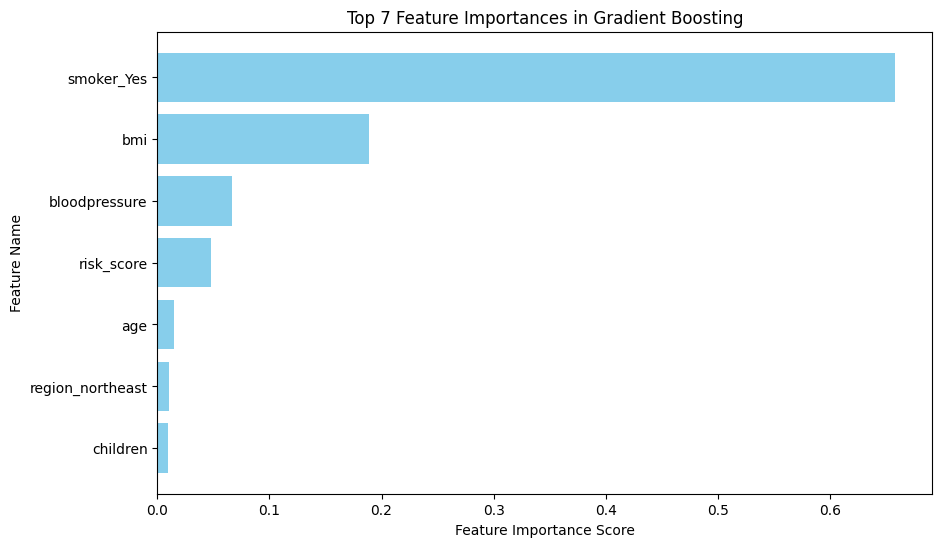

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the best tuned Gradient Boosting model
best_rf = grid_search_results["GradientBoosting"].best_estimator_

# Get feature importances
feature_importances = best_rf.feature_importances_
feature_names = best_rf.feature_names_in_

# Sort feature importance values
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Select only the top 7 features
top_n = 7
sorted_features = sorted_features[:top_n]
sorted_importances = sorted_importances[:top_n]

# Plot top 7 feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 7 Feature Importances in Gradient Boosting")
plt.gca().invert_yaxis()  # Show highest importance at the top
plt.show()


## 🔍 SHAP Analysis for Feature Importance

### 🔹 Step 15: Interpreting Model Predictions with SHAP
SHAP (SHapley Additive exPlanations) was used to explain the predictions of the Gradient Boosting model and provide insights into how features contribute to the output.

#### Key Steps:
1. **SHAP Explainer**:
   - Used the `shap.TreeExplainer` to compute SHAP values for the Gradient Boosting model.
   - Disabled `check_additivity` for compatibility with the model's implementation.

2. **SHAP Values**:
   - Calculated SHAP values for the test dataset (`X_test_encoded`).
   - Each SHAP value represents the impact of a feature on the model's prediction.

3. **Summary Plot**:
   - Generated a summary plot to visualize the importance and impact of each feature:
     - **Horizontal Axis**: SHAP values, indicating the direction and magnitude of impact on the model's output.
     - **Color**: Represents the feature's value (blue = low, red = high).

#### Insights:
- **Key Contributors**:
  - `smoker_Yes`: Has the most significant impact, with high values strongly increasing the prediction.
  - `bmi` and `bloodpressure`: Also have a substantial influence on the predictions.
  - `risk_score`, `children`, and `age`: Provide moderate contributions to the model's decisions.
- Features like `region_northeast` and `diabetic_Yes` play minor roles in comparison.

The SHAP analysis provides a detailed, interpretable view of feature importance, complementing the traditional feature importance analysis and enhancing the understanding of the model's behavior.


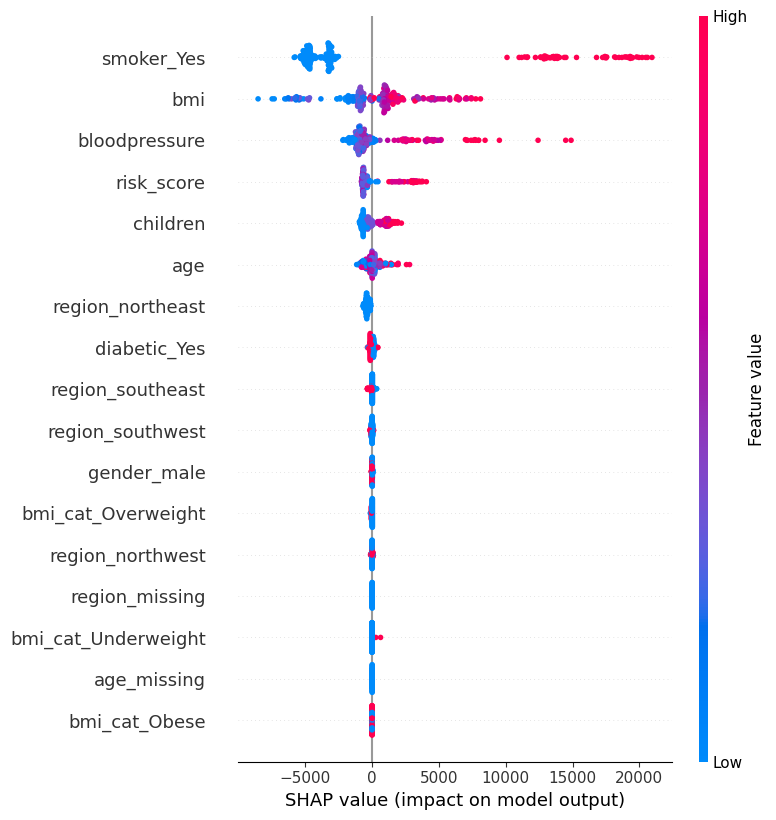

In [16]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU usage

import shap
import matplotlib.pyplot as plt

# Ensure Gradient Boosting model (gb_model) is trained
explainer = shap.TreeExplainer(gb_model)  # Create SHAP explainer

# Compute SHAP values with check_additivity disabled
shap_values = explainer.shap_values(X_test_encoded, check_additivity=False)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test_encoded)


# **Insurance Claim Prediction - Final Report**

### **Model Performance Summary**
The evaluation of multiple regression models revealed the **Gradient Boosting model** as the top-performing approach for predicting insurance claims. Below is a summary of the top three models:

1. **Gradient Boosting**:
   - **Combined Rank**: 2
   - **RMSLE**: 0.5952
   - **R²**: 0.8461
   - **Best Parameters**: `learning_rate=0.1`, `n_estimators=100`
   - **Key Strength**: Achieved the best balance between predictive accuracy and generalizability.

2. **Random Forest**:
   - **Combined Rank**: 4
   - **RMSLE**: 0.6056
   - **R²**: 0.8265
   - **Best Parameters**: `max_depth=10`, `n_estimators=300`
   - **Key Strength**: A strong performer, but slightly less accurate than Gradient Boosting.

3. **Ridge Regression**:
   - **Combined Rank**: 6
   - **RMSLE**: 0.6543
   - **R²**: 0.7237
   - **Best Parameter**: `alpha=10.0`
   - **Key Observation**: Struggled to match the non-linear models in accuracy.

---

### **Feature Importance Insights**
The analysis of feature importance using Gradient Boosting and SHAP values highlighted the following insights:
- **Top Features**:
  - `smoker_Yes`: The most impactful feature, indicating the substantial role of smoking in driving insurance claims.
  - `bmi` and `bloodpressure`: These features also played critical roles, reflecting the influence of physical health metrics.
  - Other features like `risk_score`, `age`, and `children` contributed moderately.
- The findings emphasize the importance of both behavioral (smoking) and health metrics (BMI and blood pressure) in predicting claims.

---

### **Business Insights and Recommendations**
The model findings and feature importance analysis provide actionable insights for insurers:
1. **Premium Optimization**:
   - Use insights from `smoker_Yes`, `bmi`, and `bloodpressure` to design risk-adjusted premiums.
   - High-risk customers (e.g., smokers or individuals with high BMI) can be charged higher premiums, while incentivizing healthy behaviors with discounts.

2. **Risk Mitigation Strategies**:
   - Target high-risk groups (e.g., smokers) with wellness programs or health interventions to reduce claim frequency and severity.
   - Provide education and resources for healthier lifestyles to lower overall claims.

3. **Tailored Insurance Products**:
   - Develop specialized products for specific demographic groups (e.g., non-smokers, individuals in high-risk regions) to cater to unique needs.

4. **Operational Efficiency**:
   - Focus underwriting efforts on key drivers of claim amounts, reducing the need for exhaustive manual assessments.

---

### **Future Improvements**
To further enhance the model's performance and utility, the following strategies are recommended:
1. **Hyperparameter Optimization**:
   - Conduct a more exhaustive search for hyperparameters, especially for the Gradient Boosting model, to refine performance further.
2. **Explore Ensemble Techniques**:
   - Investigate advanced ensemble approaches like stacking or blending multiple models to leverage their strengths.
3. **Expand Dataset Features**:
   - Include additional health, behavioral, and lifestyle variables (e.g., exercise habits, diet, family history) to improve predictive power.
4. **Address Target Skewness**:
   - Investigate transformations or alternative scoring metrics to handle challenges posed by skewed target distributions.

---

### **Conclusion**
The Gradient Boosting model, with its robust predictive capability and interpretability, stands out as the most effective solution for this insurance claim prediction task. The insights gained from feature importance highlight actionable factors that can inform underwriting and risk management strategies. With further refinement, the model has the potential to deliver even greater accuracy and business value while driving better decision-making for insurers.
ver even greater accuracy and business value.
